#EC9650 BIO INFORMATICS

#LAB 02

#REGRESSION TASK

2020/E/185

S.Kamsayini

Semester 6

07 AUG 2024

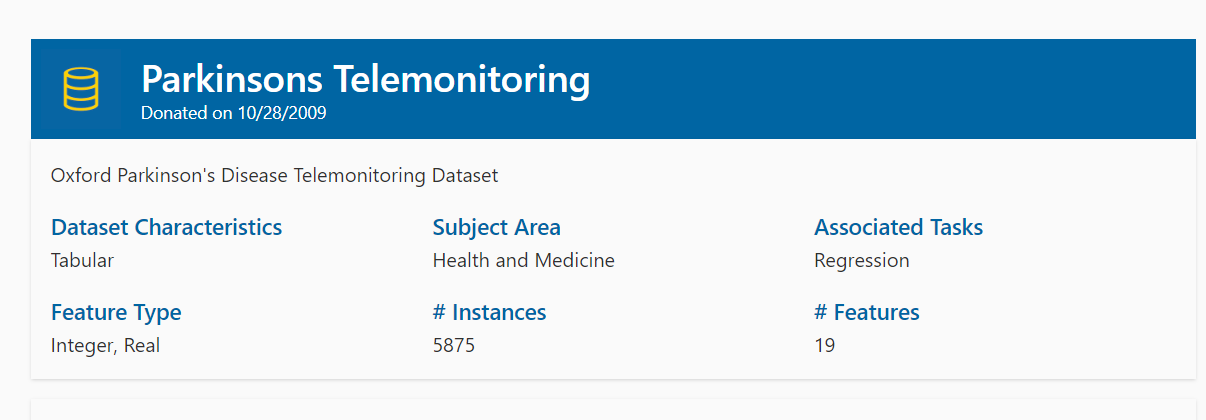

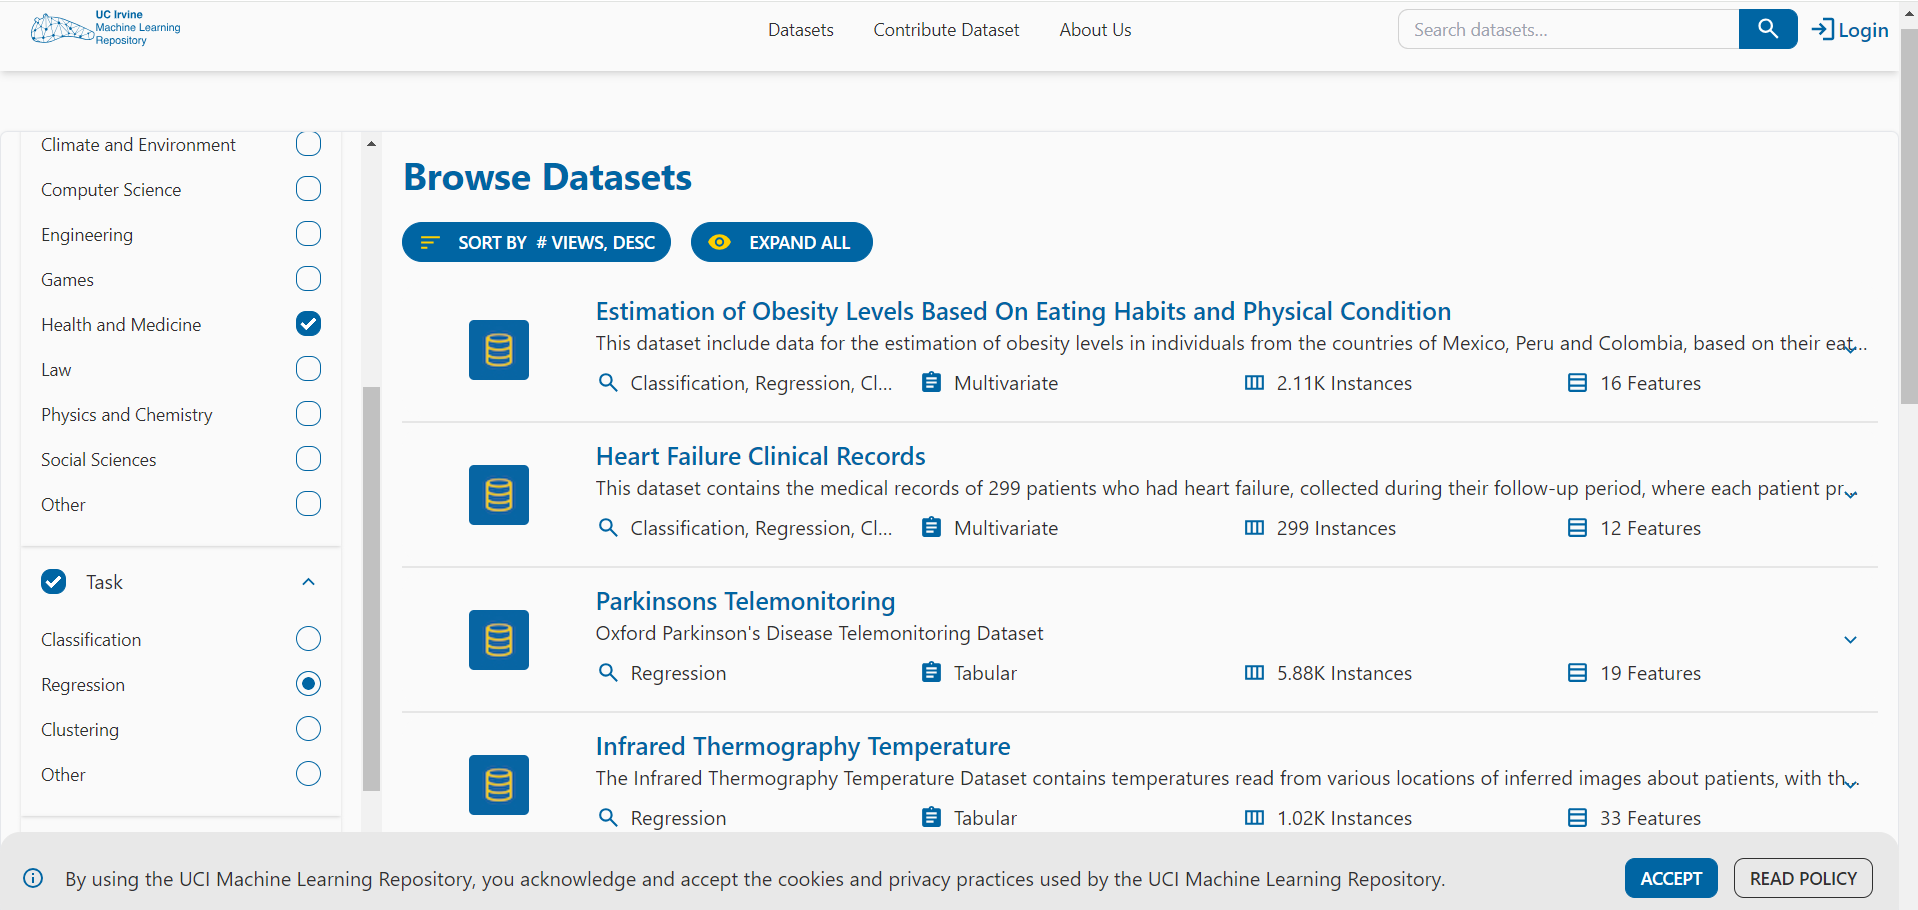

Additional Variable Information

subject# - Integer that uniquely identifies each subject

age - Subject age

sex - Subject gender '0' - male, '1' - female

test_time - Time since recruitment into the trial. The integer part is the number of days since recruitment.

motor_UPDRS - Clinician's motor UPDRS score, linearly interpolated

total_UPDRS - Clinician's total UPDRS score, linearly interpolated

Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP - Several measures of variation in fundamental frequency

Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

RPDE - A nonlinear dynamical complexity measure

DFA - Signal fractal scaling exponent

PPE - A nonlinear measure of fundamental frequency variation

Parkinson's Telemonitoring is a research dataset that aims to monitor and analyze the symptoms of Parkinson's disease using remote data collection techniques.

Features:


1. Voice measurements: The dataset includes various voice measures such as jitter, shimmer, and Mel-frequency cepstral coefficients (MFCCs) extracted from audio recordings of the participants' speech.

2. Spiral drawing: Participants were asked to draw spirals on a digital drawing tablet, and the dataset includes features extracted from the spiral drawings, such as drawing time, drawing velocity, and drawing pressure.

3. Tapping tests: Participants performed finger-tapping tasks, and the dataset includes features related to the tapping patterns, such as tapping rate, variability, and rhythm.

4. Demographic and clinical data: The dataset also includes participants' demographic information, such as age, gender, and disease duration, as well as clinical assessments of Parkinson's disease symptoms.

Targets

The primary target of the Parkinson's Telemonitoring dataset is to predict the severity of Parkinson's disease symptoms, which is typically measured using the Unified Parkinson's Disease Rating Scale (UPDRS). The UPDRS is a standardized assessment that evaluates various aspects of Parkinson's disease, including motor symptoms, activities of daily living, and cognitive function.


Samples

The dataset includes data from 5,875 recordings collected from 42 individuals with Parkinson's disease. The participants were required to perform the voice, spiral drawing, and tapping tests at home, using a specialized telemonitoring system. The dataset provides a unique opportunity to study the progression of Parkinson's disease symptoms over time and explore the potential of remote monitoring technologies in disease management.

The Parkinson's Telemonitoring dataset has been widely used in research for developing machine learning models to predict Parkinson's disease symptoms and monitor disease progression remotely. It has the potential to improve the management of Parkinson's disease by providing clinicians with more frequent and objective assessments of their patients' conditions, enabling earlier interventions and personalized treatment approaches.

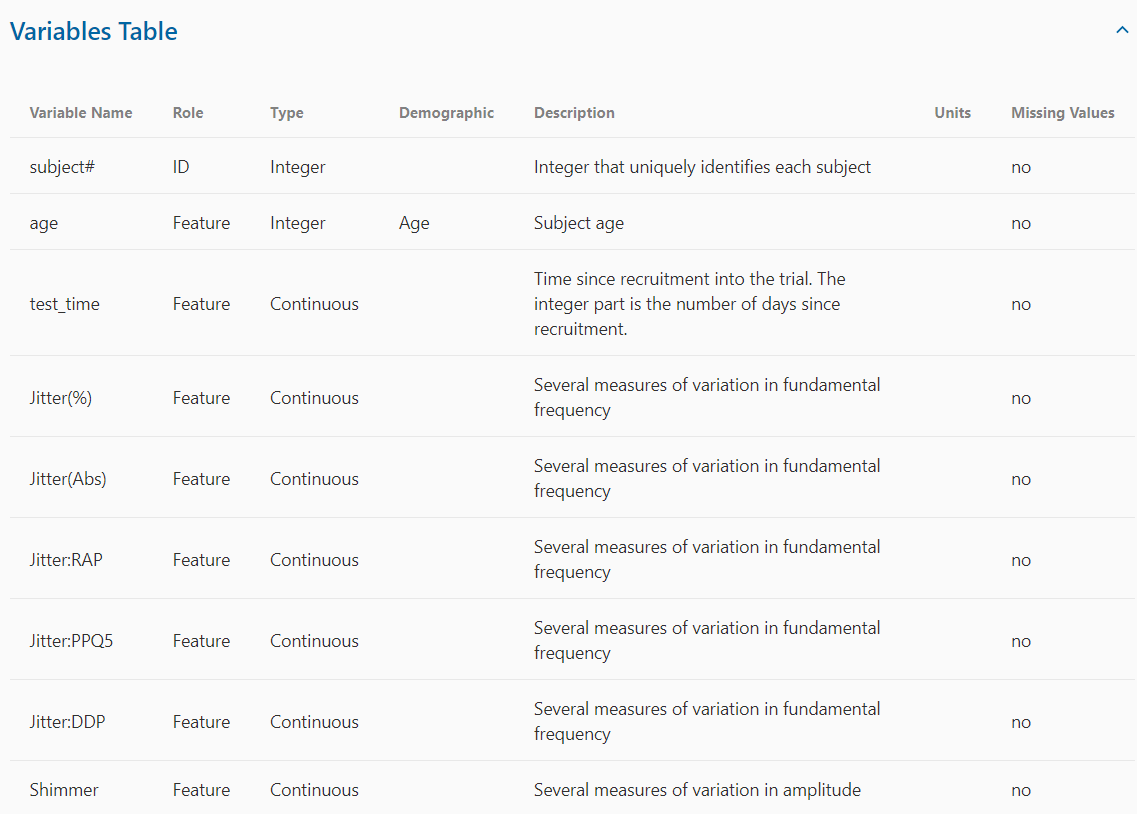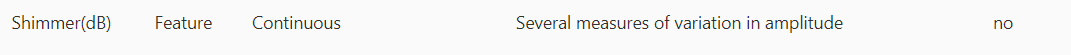

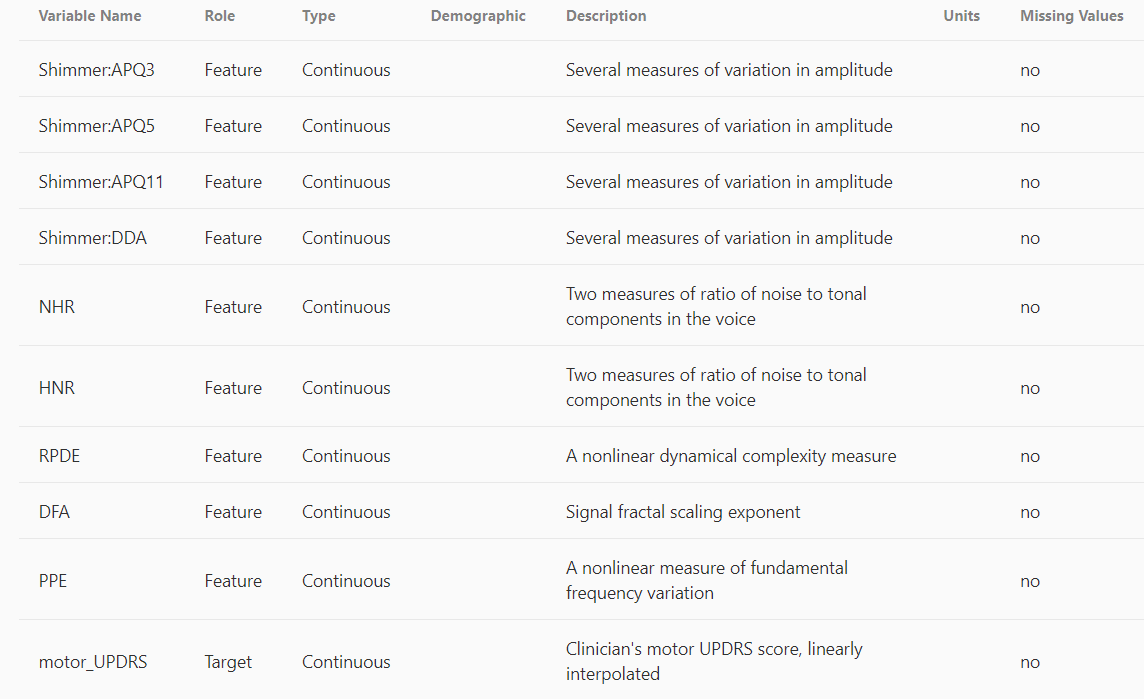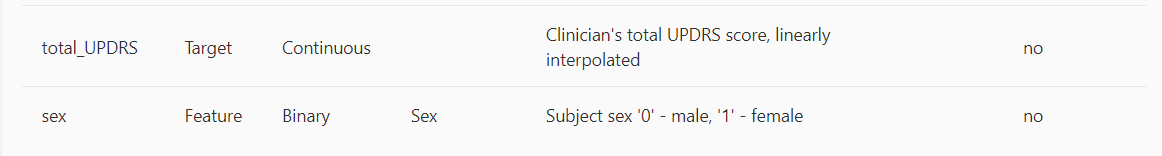

# Importing Libraries

In [ ]:
!pip install tensorflow_addons

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras import backend as K
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing Dataset

In [ ]:
df = pd.read_csv('parkinsons_updrs.csv')

In [ ]:
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [ ]:
df.isnull().sum()

,0
subject#,0
age,0
sex,0
test_time,0
motor_UPDRS,0
total_UPDRS,0
Jitter(%),0
Jitter(Abs),0
Jitter:RAP,0
Jitter:PPQ5,0


No null values found in the dataset

In [ ]:
df.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


Here we can see a weird discrepancy in the data. The min value of "test_time" is negative.

From the UCI ML Repository, the description of "test_time" is as follows: "Time since recruitment into the trial. The integer part is the number of days since recruitment."

How can that be negative for a patient?

In [ ]:
df[df['test_time'] < 0].count()

,0
subject#,12
age,12
sex,12
test_time,12
motor_UPDRS,12
total_UPDRS,12
Jitter(%),12
Jitter(Abs),12
Jitter:RAP,12
Jitter:PPQ5,12


We have 12 such entries that have a negative "test_time". It is better to drop these entries to avoid confusion for the models.

In [ ]:
df = df[df['test_time'] > 0]

## Correlation Matrix

<Axes: >

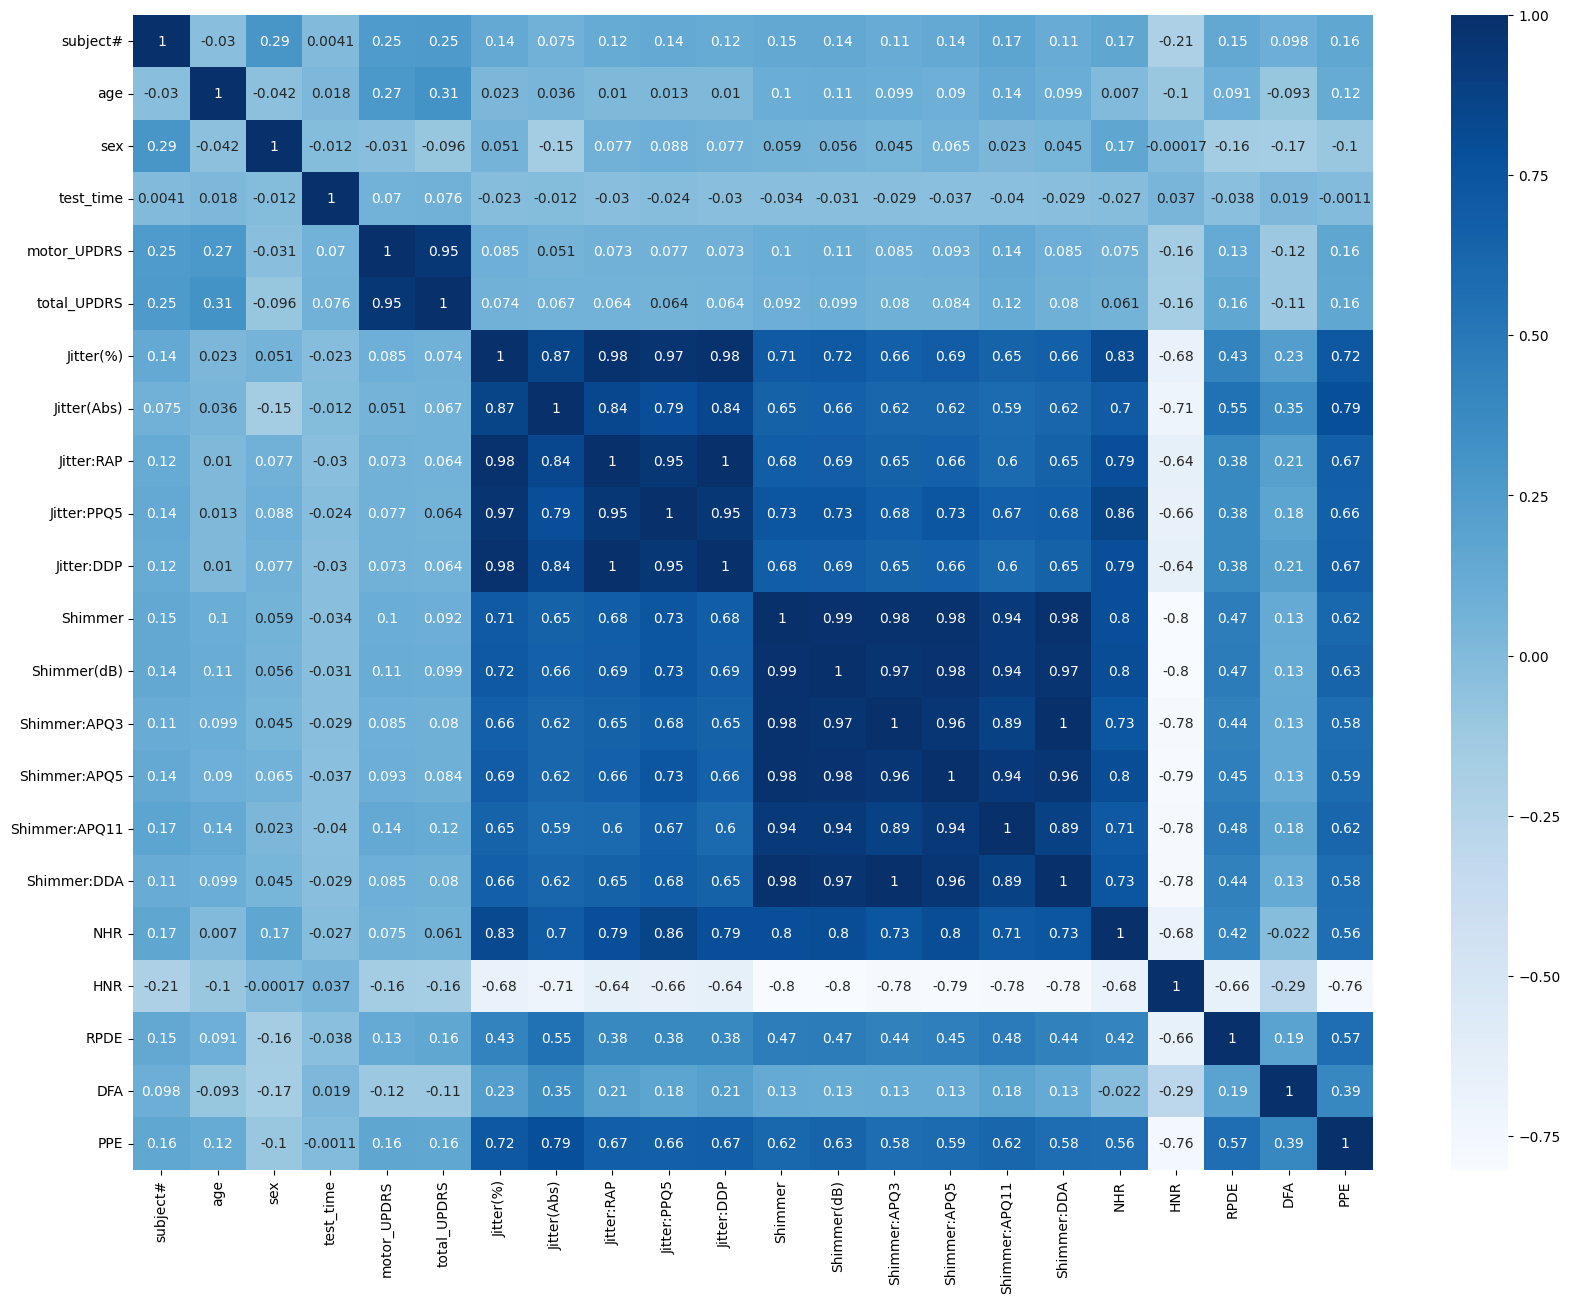

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

As we can see, the data is highly correlated. Let us use Principal Component Analysis to narrow down the correlated features.

## PCA

In [ ]:
data = df.copy()

Let us drop "subject#" from the dataset entirely as it not useful for our model.

Let us also seperate the target variables before applying PCA.

In [ ]:
data.drop(['subject#'], axis=1, inplace=True)

In [ ]:
y1 = data['motor_UPDRS']
y2 = data['total_UPDRS']
data.drop(['motor_UPDRS', 'total_UPDRS'], axis=1, inplace=True)

## Splitting the data into Training and Test Set

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(data, y1, test_size=0.2, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(data, y2, test_size=0.2, random_state=42)

I will use x1_train to perform PCA tests.

In [ ]:
pca = PCA(n_components=14)
principal_components = pca.fit_transform(data)

In [ ]:
pca_df = pd.DataFrame(principal_components, columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13','PCA14'])

In [ ]:
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14
0,-87.395804,-7.420439,-0.726184,-0.305428,-0.061443,-0.145538,-0.117522,-0.039417,-0.005717,0.004253,-0.005202,0.007683,-0.000184,0.000895
1,-80.356512,-7.029604,-6.230253,-0.300305,0.123614,-0.029321,-0.056080,-0.010225,0.015743,0.000700,0.001452,0.001396,-0.000623,0.000759
2,-73.353852,-7.286398,-2.084574,-0.306433,-0.051730,-0.065026,-0.080630,-0.084761,-0.003402,-0.005916,-0.003816,0.000107,-0.000292,0.000044
3,-67.383779,-7.176695,-3.449752,-0.303573,0.151028,0.019233,0.044212,-0.143779,-0.033837,-0.014053,-0.013288,-0.008359,-0.001464,-0.003801
4,-59.383841,-7.040801,-5.108805,-0.302410,0.073341,0.003149,-0.031279,-0.068282,-0.002099,-0.006452,0.001422,-0.001590,-0.000216,0.000102


Plotting a Scree plot to perform the Elbow method to find the ideal components of PCA

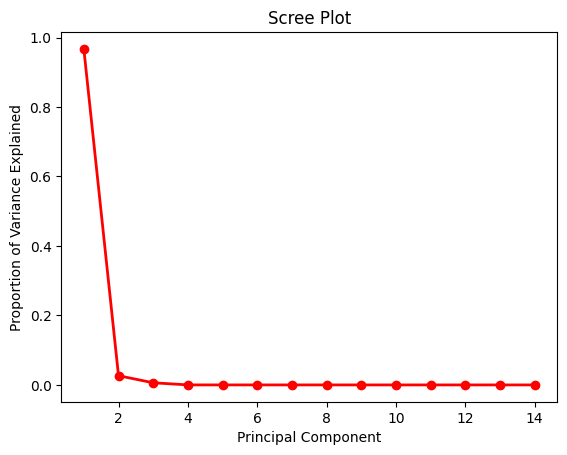

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
print(pca.explained_variance_)

[2.84316873e+03 7.81730907e+01 1.81791690e+01 2.17453979e-01
 2.05138259e-02 5.55632337e-03 5.02483651e-03 2.68092818e-03
 1.00518116e-03 1.03934678e-04 4.52955553e-05 3.22145711e-05
 6.80769578e-06 3.37466484e-06]


Hence we decide to keep 3 Principal Components as from the 4th value onwards, the Eigen Values are less than 1.

The reason we seperated the data into training and test set so early is due avoid information leakage and overfitting of our model.

The model should never have seen the test data to evaluate it's performance accurately.

In [ ]:
pca1 = PCA(n_components=3, random_state=42)
pca2 = PCA(n_components=3, random_state=42)
x1_train = pca1.fit_transform(x1_train)
x1_test = pca1.transform(x1_test)

x2_train = pca2.fit_transform(x2_train)
x2_test = pca2.transform(x2_test)

Our data is ready to be fitted into Regression Models.

## Function for Evaluating Model Performance

In [ ]:
def score(y_pred,y_test):
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)*100
    print("Mean Absolute Error: ", mae)
    print("Mean Squared Error: ", mse)
    print("R2 score: ", r2,)
    return (mae, mse, r2)

# Models

## Y1 Variabale: motor_UPDRS

### Decision Tree Regression

In [ ]:
dt_reg1 = DecisionTreeRegressor()
dt_reg1.fit(x1_train, y1_train)
y_dt_pred1 = dt_reg1.predict(x1_test)

In [ ]:
dt_mae1, dt_mse1, dt_r21 = score(y1_test, y_dt_pred1)

Mean Absolute Error:  1.6024789428815005
Mean Squared Error:  20.37889326115942
R2 score:  68.24437940531021


### Random Forrest Regression

In [ ]:
rf_reg1 = RandomForestRegressor()
rf_reg1.fit(x1_train, y1_train)
y_rf_pred1 = rf_reg1.predict(x1_test)

In [ ]:
rf_mae1, rf_mse1, rf_r21 = score(y1_test, y_rf_pred1)

Mean Absolute Error:  2.09820995652174
Mean Squared Error:  15.637841306383564
R2 score:  70.00526732896925


### XGBoost Regression

In [ ]:
xgb_reg1 = XGBRegressor(objective='reg:squarederror')
xgb_reg1.fit(x1_train, y1_train)
y_xgb_pred1 = xgb_reg1.predict(x1_test)

In [ ]:
xgb_mae1, xgb_mse1, xgb_r21 = score(y1_test, y_xgb_pred1)

Mean Absolute Error:  2.135008627509258
Mean Squared Error:  11.01572985120686
R2 score:  78.62127762037245


## Comparing Model1 Performance

In [ ]:
model_mae1 = [dt_mae1, rf_mae1, xgb_mae1]
model_mse1 = [dt_mse1, rf_mse1, xgb_mse1]
model_r21 = [dt_r21, rf_r21, xgb_r21]
models=["Decision Tree", "Random Forrest", "XGBoost"]

Text(0.5, 1.0, 'Comparing Model1 MAE(Test Set)')

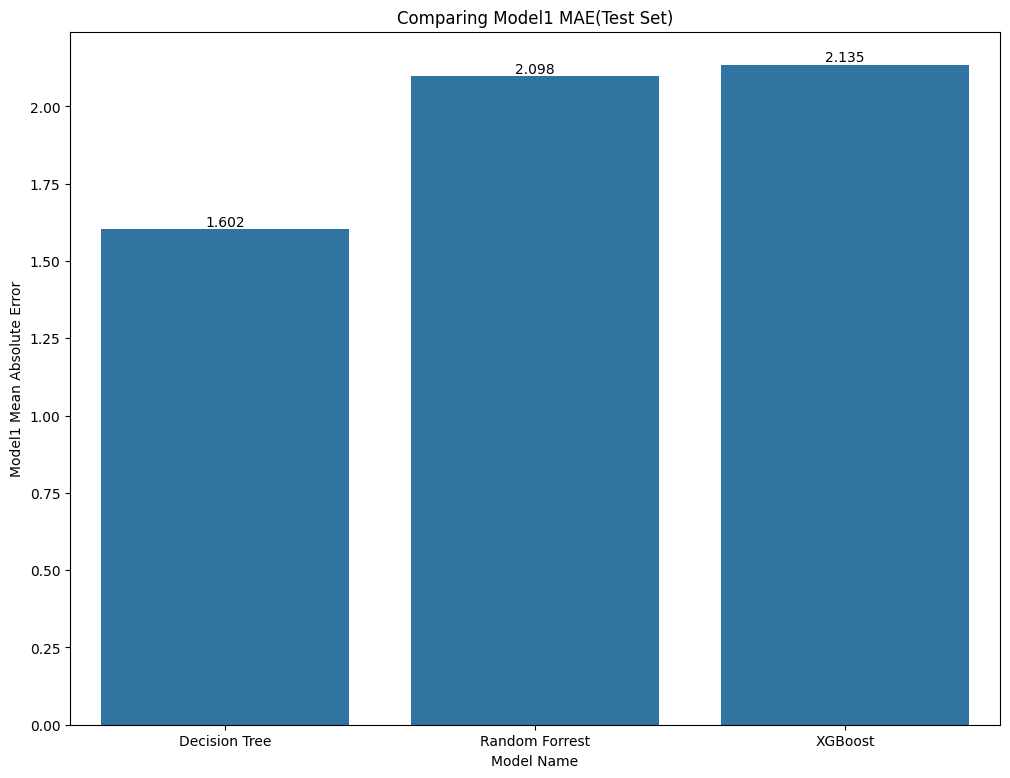

In [ ]:
plt.figure(figsize=(12,9))
ax = sns.barplot(x=models, y=model_mae1)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height+0.01,
          '{:1.3f}'.format(height),
          ha='center')

plt.ylabel('Model1 Mean Absolute Error')
plt.xlabel('Model Name')
plt.title('Comparing Model1 MAE(Test Set)')

Text(0.5, 1.0, 'Comparing Model1 MSE(Test Set)')

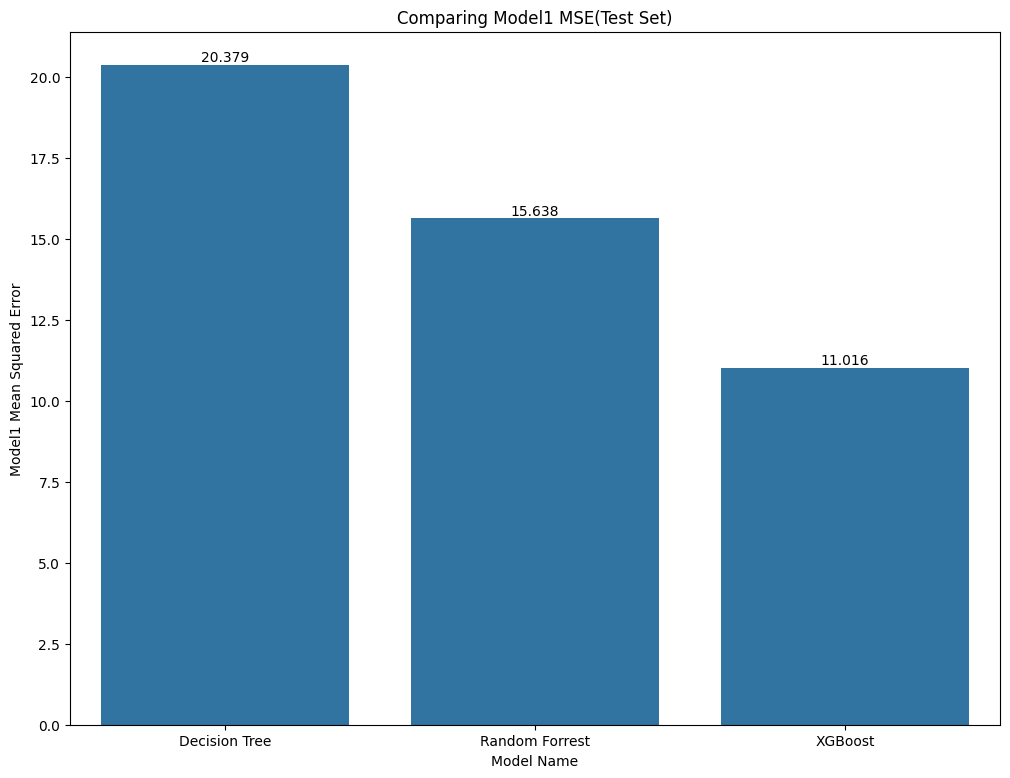

In [ ]:
plt.figure(figsize=(12,9))
ax = sns.barplot(x=models, y=model_mse1)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height+0.1,
          '{:1.3f}'.format(height),
          ha='center')

plt.ylabel('Model1 Mean Squared Error')
plt.xlabel('Model Name')
plt.title('Comparing Model1 MSE(Test Set)')

Text(0.5, 1.0, 'Comparing Model1 R2 Score(Test Set)')

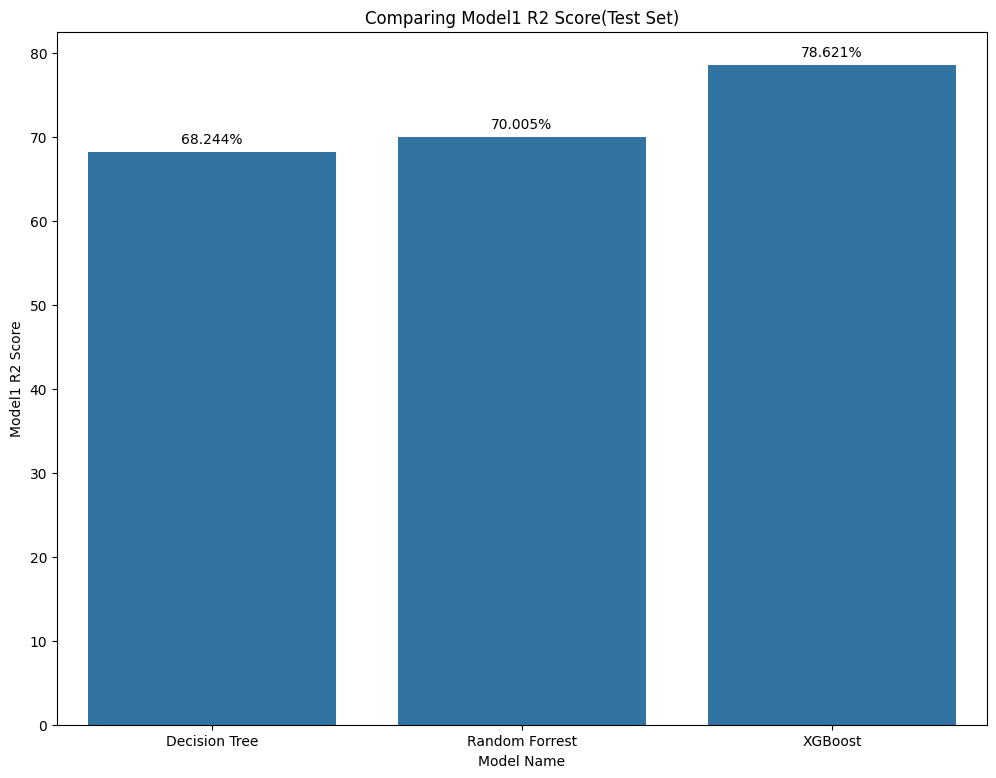

In [ ]:
plt.figure(figsize=(12,9))
ax = sns.barplot(x=models, y=model_r21)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 1,
          '{:1.3f}%'.format(height),
          ha='center')

plt.ylabel('Model1 R2 Score')
plt.xlabel('Model Name')
plt.title('Comparing Model1 R2 Score(Test Set)')

### Performing Cross Validation for our models.

#### R2 Score

In [ ]:
dt_cv1 = cross_val_score(dt_reg1,x1_train, y1_train, cv=10, scoring='r2')
rf_cv1 = cross_val_score(rf_reg1,x1_train, y1_train, cv=10, scoring='r2')
xgb_cv1 = cross_val_score(xgb_reg1,x1_train, y1_train, cv=10, scoring='r2')

In [ ]:
print("Cross Validation Score for Decision Tree Regression is: {:1.3f} +- {:1.3f}".format(dt_cv1.mean()*100, dt_cv1.std()*100))
print("Cross Validation Score for Random Forrest Regression is: {:1.3f} +- {:1.3f}".format(rf_cv1.mean()*100, rf_cv1.std()*100))
print("Cross Validation Score for XGBoost Model is: {:1.3f} +- {:1.3f}".format(xgb_cv1.mean()*100, xgb_cv1.std()*100))

Cross Validation Score for Decision Tree Regression is: 65.504 +- 6.009
Cross Validation Score for Random Forrest Regression is: 76.899 +- 2.384
Cross Validation Score for XGBoost Model is: 80.280 +- 2.132


#### Thus XGBOOST is the best model for Y1 Variable(motor_UPDRS) with a **MAE of 2.132 and R2 score of 80.28%**

## Y2 Variable: total_UPDRS

The Correlation Matrix gave us an interesting insight. "motor_UPDRS" and "total_UPDRS" are highly correlated(0.95).

In our current dataset, we already have the recorded data of "motor_UPDRS". But for future predictions, that might not be the case.

Hence we can use feature engineering to get a new highly correlated feature using our Model 1 for the "total_UPDRS" prediction.

We will use XGBOOST predictions as the new feature for our Model 2 as it was the best performing model.

### Adding the "motor_UPDRS" values predicted by our Model 1 to the second training and test set.

In [ ]:
motor_train = xgb_reg1.predict(x1_train)
motor_test = xgb_reg1.predict(x1_test)

In [ ]:
x2_train = pd.DataFrame(x2_train, columns = ['PCA1', 'PCA2', 'PCA3'])

In [ ]:
x2_test = pd.DataFrame(x2_test, columns = ['PCA1', 'PCA2', 'PCA3'])

In [ ]:
x2_train['motor_UPDRS'] = motor_train

In [ ]:
x2_test['motor_UPDRS'] = motor_test

### Linear Regression

In [ ]:
lin_reg2 = LinearRegression()
lin_reg2.fit(x2_train, y2_train)
y_lin_pred2 = lin_reg2.predict(x2_test)

In [ ]:
lin_mae2, lin_mse2, lin_r22 = score(y2_test,y_lin_pred2)

Mean Absolute Error:  3.8341930802872657
Mean Squared Error:  24.613831175078822
R2 score:  73.00033410870904


### Polynomial Regression

In [ ]:
poly2 = PolynomialFeatures(degree=3)
x2_poly = poly2.fit_transform(x2_train)

In [ ]:
poly_reg2 = LinearRegression()
poly_reg2.fit(x2_poly, y2_train)
y_poly_pred2 = poly_reg2.predict(poly2.transform(x2_test))

In [ ]:
poly_mae2, poly_mse2, poly_r22 = score(y2_test, y_poly_pred2)

Mean Absolute Error:  3.6206046230243434
Mean Squared Error:  22.928651438744446
R2 score:  75.46340017701758


### Support Vector Machines

In [ ]:
svr_reg2 = SVR()
svr_reg2.fit(x2_train, y2_train)
y_svr_pred2 = svr_reg2.predict(x2_test)

In [ ]:
svr_mae2, svr_mse2, svr_r22 = score(y2_test, y_svr_pred2)

Mean Absolute Error:  3.8164717516589213
Mean Squared Error:  25.076934702003914
R2 score:  68.35854479929428


### Decision Tree Regression

In [ ]:
dt_reg2 = DecisionTreeRegressor()
dt_reg2.fit(x2_train, y2_train)
y_dt_pred2 = dt_reg2.predict(x2_test)

In [ ]:
dt_mae2, dt_mse2, dt_r22 = score(y2_test, y_dt_pred2)

Mean Absolute Error:  1.9266960784313727
Mean Squared Error:  19.91289251049446
R2 score:  81.76374937812007


### Random Forrest Regression

In [ ]:
rf_reg2 = RandomForestRegressor()
rf_reg2.fit(x2_train, y2_train)
y_rf_pred2 = rf_reg2.predict(x2_test)

In [ ]:
rf_mae2, rf_mse2, rf_r22 = score(y2_test, y_rf_pred2)

Mean Absolute Error:  1.922804817561807
Mean Squared Error:  15.926222429565552
R2 score:  84.48981050541751


### XGBoost Regression

In [ ]:
xgb_reg2 = XGBRegressor(objective='reg:squarederror')
xgb_reg2.fit(x2_train, y2_train)
y_xgb_pred2 = xgb_reg2.predict(x2_test)

In [ ]:
xgb_mae2, xgb_mse2, xgb_r22 = score(y2_test, y_xgb_pred2)

Mean Absolute Error:  2.0360499720008374
Mean Squared Error:  14.762273973817955
R2 score:  85.72736678163699


## Comparing Model2 Performance

In [ ]:
model_mae2 = [lin_mae2,poly_mae2, svr_mae2, dt_mae2, rf_mae2, xgb_mae2]
model_mse2 = [lin_mse2,poly_mse2, svr_mse2, dt_mse2, rf_mse2, xgb_mse2]
model_r22 = [lin_r22,poly_r22, svr_r22, dt_r22, rf_r22, xgb_r22]
models2 = ["Linear Regression", "Polynomial Regression", "Support Vector Machines","Decision Tree", "Random Forrest", "XGBoost"]

Text(0.5, 1.0, 'Comparing Model2 MAE(Test Set)')

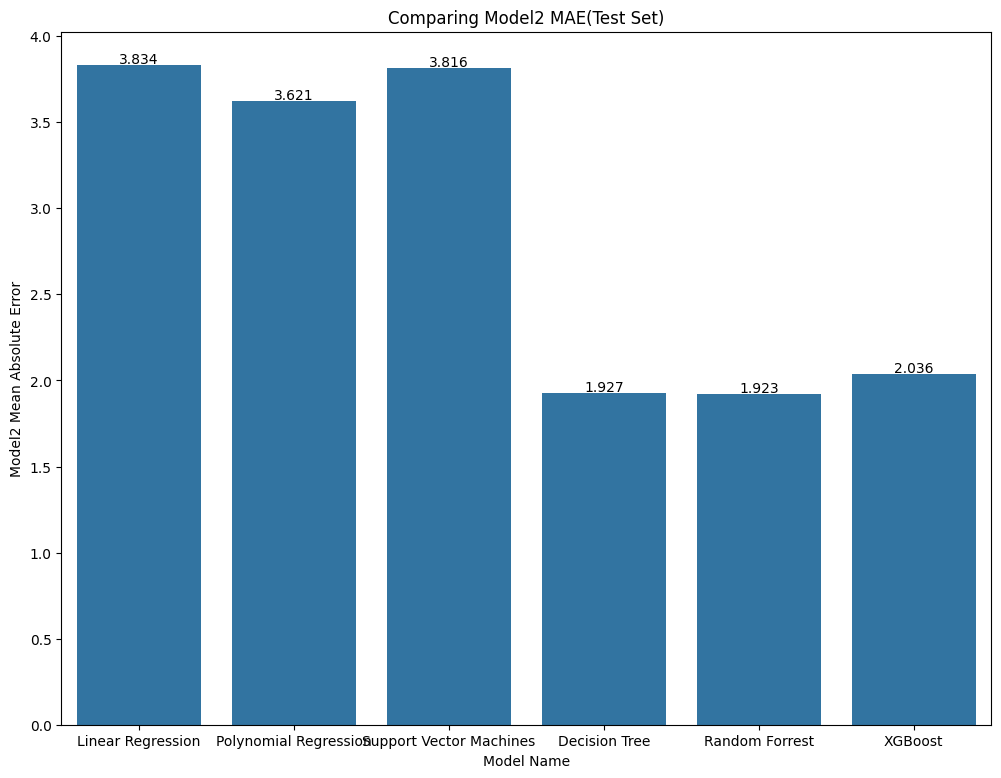

In [ ]:
plt.figure(figsize=(12,9))
ax = sns.barplot(x=models2, y=model_mae2)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height+0.01,
          '{:1.3f}'.format(height),
          ha='center')

plt.ylabel('Model2 Mean Absolute Error')
plt.xlabel('Model Name')
plt.title('Comparing Model2 MAE(Test Set)')

Text(0.5, 1.0, 'Comparing Model2 MSE(Test Set)')

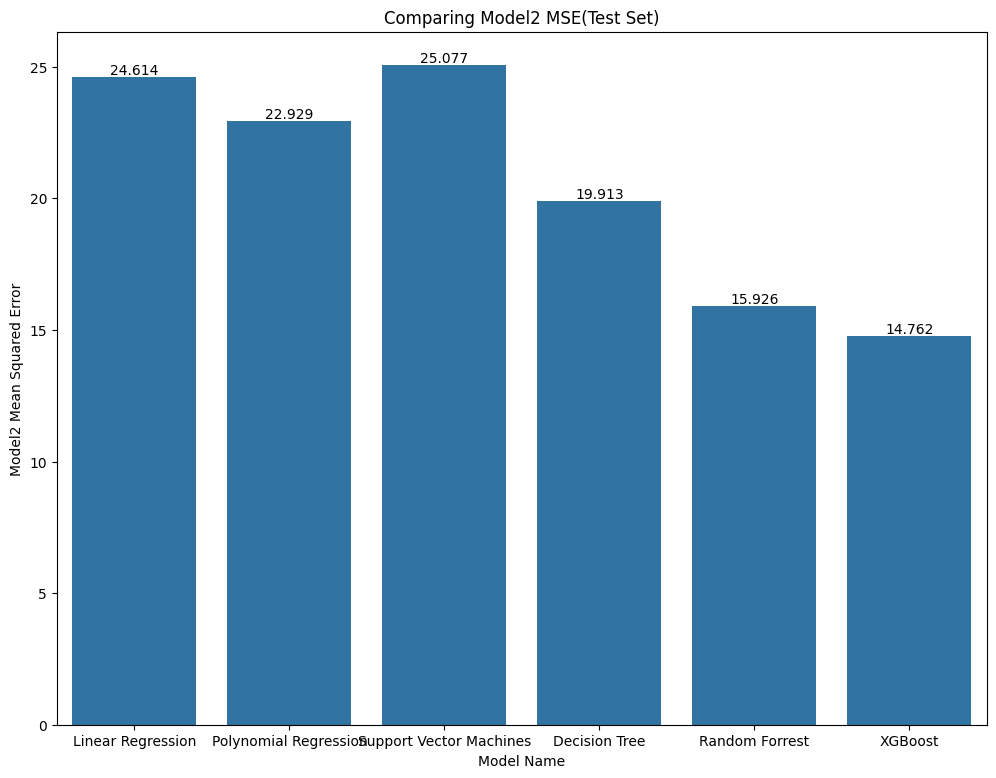

In [ ]:
plt.figure(figsize=(12,9))
ax = sns.barplot(x=models2, y=model_mse2)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height+0.1,
          '{:1.3f}'.format(height),
          ha='center')

plt.ylabel('Model2 Mean Squared Error')
plt.xlabel('Model Name')
plt.title('Comparing Model2 MSE(Test Set)')

Text(0.5, 1.0, 'Comparing Model2 R2 Score(Test Set)')

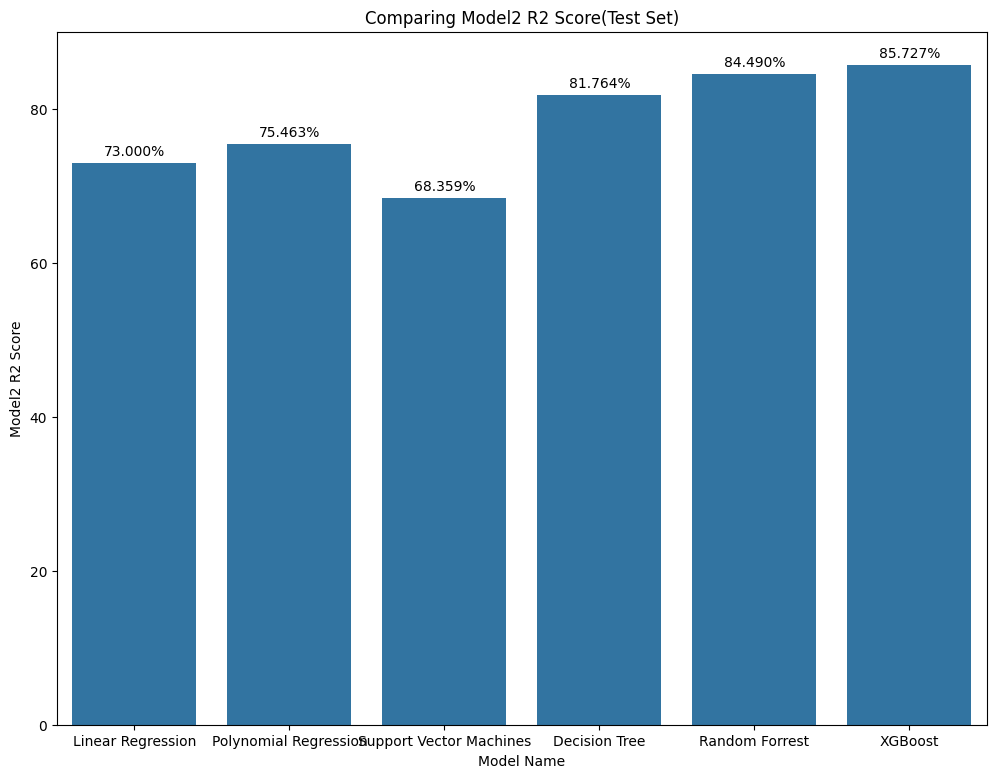

In [ ]:
plt.figure(figsize=(12,9))
ax = sns.barplot(x=models2, y=model_r22)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 1,
          '{:1.3f}%'.format(height),
          ha='center')

plt.ylabel('Model2 R2 Score')
plt.xlabel('Model Name')
plt.title('Comparing Model2 R2 Score(Test Set)')

### Performing Cross Validation for our 3 best performing models

In [ ]:
dt_cv2 = cross_val_score(dt_reg2,x2_train, y2_train, cv=10, scoring='r2')
rf_cv2 = cross_val_score(rf_reg2,x2_train, y2_train, cv=10, scoring='r2')
xgb_cv2 = cross_val_score(xgb_reg2,x2_train, y2_train, cv=10, scoring='r2')

In [ ]:
print("Cross Validation Score for Decision Tree Regression is: {:1.3f} +- {:1.3f}".format(dt_cv2.mean()*100, dt_cv2.std()*100))
print("Cross Validation Score for Random Forrest Regression is: {:1.3f} +- {:1.3f}".format(rf_cv2.mean()*100, rf_cv2.std()*100))
print("Cross Validation Score for XGBoost Model is: {:1.3f} +- {:1.3f}".format(xgb_cv2.mean()*100, xgb_cv2.std()*100))

Cross Validation Score for Decision Tree Regression is: 94.567 +- 0.824
Cross Validation Score for Random Forrest Regression is: 97.190 +- 0.626
Cross Validation Score for XGBoost Model is: 97.004 +- 0.452


#### Thus Random Forrest Regressionis is the best model for Y2 Variable(total_UPDRS) based onlast output



Decision Tree Regression:
Cross-Validation Score: 94.567 ± 0.824
This model achieves a high cross-validation score of around 94.567%, indicating it has a good fit on the training data.
The relatively low standard deviation of 0.824 suggests the model's performance is stable across the cross-validation folds.

Random Forest Regression:
Cross-Validation Score: 97.190 ± 0.626
The Random Forest Regression model performs the best among the three, with a cross-validation score of around 97.190%.
The low standard deviation of 0.626 indicates the model's performance is consistent across the cross-validation folds.
Random Forest is known for its ability to handle complex, non-linear relationships in the data, which likely contributes to its superior performance.

XGBoost Model:
Cross-Validation Score: 97.004 ± 0.452
The XGBoost model also achieves a very high cross-validation score of around 97.004%.
The standard deviation of 0.452 is the lowest among the three models, suggesting the XGBoost model has the most stable performance across the cross-validation folds.
XGBoost is a powerful, tree-based ensemble learning algorithm that can effectively capture the underlying patterns in the data, leading to its excellent performance.

Comparing the three models:

Both the Random Forest Regression and XGBoost models outperform the Decision Tree Regression model in terms of cross-validation score.
The Random Forest Regression and XGBoost models have very similar cross-validation scores, with the Random Forest Regression model slightly edging out the XGBoost model.
The XGBoost model, however, has the lowest standard deviation, indicating the most consistent performance across the cross-validation folds.

All three models demonstrate strong performance, with cross-validation scores above 94%.
The Random Forest Regression and XGBoost models are the top performers, with the Random Forest Regression model being slightly better on average, but the XGBoost model being more consistent.
The high cross-validation scores and low standard deviations suggest that these models can effectively capture the underlying patterns in the Parkinson's Telemonitoring dataset and provide reliable predictions.

##SUMMARY

The analysis in detail, considering both the target variables.

1. Data Exploration and Preprocessing:
   - The dataset includes 22 features, including the two target variables: "motor_UPDRS" and "total_UPDRS".
   - The initial data exploration revealed a negative minimum value for the "test_time" feature, which is addressed by removing the 12 rows with negative values.
   - There are no missing values in the dataset.

2. Correlation Analysis:
   - The correlation matrix shows a high correlation (0.95) between the two target variables, "motor_UPDRS" and "total_UPDRS".

3. Principal Component Analysis (PCA):
   - PCA is performed to reduce the dimensionality of the dataset, as the features are highly correlated.
   - The Scree plot and explained variance ratio are used to determine the optimal number of principal components (3).
   - The training and test sets are transformed using the selected 3 principal components.

4. Model Building and Evaluation:
   - The analysis considers two separate models, one for each target variable:
     - Model 1: Predicting "motor_UPDRS"
     - Model 2: Predicting "total_UPDRS"

   Model 1: Predicting "motor_UPDRS"
   - The following models are tested:
     - Decision Tree Regression
     - Random Forest Regression
     - XGBoost Regression
   - The performance metrics (MAE, MSE, R2) are evaluated on the test set.
   - Cross-validation is also performed to further assess the model performance.
   - The XGBoost model emerges as the best performer for the "motor_UPDRS" target, with the highest R2 score of 78.62%.

   Model 2: Predicting "total_UPDRS"
   - To predict "total_UPDRS", the author incorporates the predicted "motor_UPDRS" values from the first model as a new feature.
   - The following models are tested:
     - Linear Regression
     - Polynomial Regression
     - Support Vector Machines (SVR)
     - Decision Tree Regression
     - Random Forest Regression
     - XGBoost Regression
   - The performance metrics (MAE, MSE, R2) are evaluated on the test set.
   - The Random Forest Regression and XGBoost models perform the best, with R2 scores of 84.49% and 85.73%, respectively.

5. Model Comparison:
   - The performance of the models is visually compared using bar plots for both target variables.
   - For "motor_UPDRS", the XGBoost model outperforms the other models.
   - For "total_UPDRS", the Random Forest and XGBoost models demonstrate the best performance.

 The approach of building separate models for the two target variables is shown here, given the high correlation between them. The feature engineering step of incorporating the predicted "motor_UPDRS" values into the second model is a good strategy to improve the performance for "total_UPDRS".

The model selection, evaluation, and comparison are done systematically, and the conclusions drawn are well-supported by the results. The use of cross-validation further strengthens the reliability of the model performance assessment.
